In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
#                                     Add, MaxPooling2D, Flatten, Dense

class Autoencoder:
    def __init__(self):
        self.encoder_model = None
        self.model = None
        return
    
    def build_simple_ae(self, input_dim, encoding_dim):
        input_layer = Input(shape=(input_dim,))
        encoder_output = Dense(encoding_dim, activation='relu') (input_layer)
        self.encoder_model = Model(input_layer, encoder_output)
        decoder_output = Dense(input_dim, activation='sigmoid') (encoder_output)
        self.model = Model(input_layer, decoder_output)
        self.model.compile(optimizer='adadelta', loss='binary_crossentropy')
        return
    
    def build_sparse_ae(self, input_dim, encoding_dim):
        input_layer = Input(shape=(input_dim,))
        encoder_output = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5)) (input_layer)
        self.encoder_model = Model(input_layer, encoder_output)
        decoder_output = Dense(input_dim, activation='sigmoid') (encoder_output)
        self.model = Model(input_layer, decoder_output)
        self.model.compile(optimizer='adadelta', loss='binary_crossentropy')
        return
    
    def build_deep_ae(self, input_dim, encoding_dim, opt):
        input_layer = Input(shape=(input_dim,))
        
        hidden_one = Dense(encoding_dim*4, activation='relu') (input_layer)
        hidden_two = Dense(encoding_dim*2, activation='relu') (hidden_one)
        encoder_output = Dense(encoding_dim, activation='relu') (hidden_two)
        self.encoder_model = Model(input_layer, encoder_output)
        
        hidden_three = Dense(encoding_dim*2, activation='relu') (encoder_output)
        hidden_four = Dense(encoding_dim*4, activation='relu') (hidden_three)
        decoder_output = Dense(input_dim, activation='sigmoid') (hidden_four)
        self.model = Model(input_layer, decoder_output)
        
        self.model.compile(optimizer=opt, loss='binary_crossentropy', )
        return
    
    def build_conv_ae(self, input_dims, encoding_dim):
        input_layer = Input(shape=input_dims)
        conv_one = Conv2D(16, (3,3), activation='relu', padding='same') (input_layer)
        pool_one = MaxPooling2D((2,2), padding='same') (conv_one)
        conv_two = Conv2D(8, (3,3), activation='relu', padding='same') (pool_one)
        pool_two = MaxPooling2D((2,2), padding='same') (conv_two)
        conv_three = Conv2D(8, (3,3), activation='relu', padding='same') (pool_two)
        encoder_output = MaxPooling2D((2,2), padding='same') (conv_three)
        self.encoder_model = Model(input_layer, encoder_output)
        
        conv_four = Conv2D(8, (3,3), activation='relu', padding='same') (encoder_output)
        upsamp_one = UpSampling2D((2,2)) (conv_four)
        conv_five = Conv2D(8, (3,3), activation='relu', padding='same') (upsamp_one)
        upsamp_two = UpSampling2D((2,2)) (conv_five)
        conv_six = Conv2D(16, (3,3), activation='relu') (upsamp_two)
        upsamp_three = UpSampling2D((2,2)) (conv_six)
        decoder_output = Conv2D(1, (3,3), activation='sigmoid', padding='same') (upsamp_three)
        self.model = Model(input_layer, decoder_output)
        
        self.model.compile(optimizer='adagrad', loss='binary_crossentropy')
        return
    
    def load(self, model_file, encoder_model_file):
        self.encoder_model = load_model(encoder_model_file)
        self.model = load_model(model_file)
        return
    
    def train(self, train_input, train_output,
             val_input, val_output,
             epochs=50,
             batch_size=256,
             shuffle=True):
        history = self.model.fit(train_input, train_output,
                      epochs=epochs, batch_size=batch_size,
                      shuffle=True,
                      validation_data=(val_input, val_output),
                      )
        return history
    
    def encoder_predict(self, test_input):
        return self.encoder_model.predict(test_input)
    
    def predict(self, test_input):
        return self.model.predict(test_input)
    
    def save(self, model_file, encoder_model_file):
        self.model.save(model_file)
        self.encoder_model.save(encoder_model_file)
        return

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras import optimizers
# import numpy as np

# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print (x_train.shape)
# print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
import pickle

pickle_in = open("model-features/cbir-resnet-features.pickle", "rb")
features = pickle.load(pickle_in)

pickle_in = open("model-features/cbir-resnet-features-test.pickle", "rb")
features_test = pickle.load(pickle_in)

print (features.shape)
print (features_test.shape)

(50000, 10)
(10000, 10)


In [4]:
# jalanin cell ini kalo ga ada pickle

# feature_extractor = load_model('model-features/features.h5', compile=False)
# features = feature_extractor.predict(x_train)
# pickle_out = open("model-features/cbir-resnet-features.pickle", "wb")
# pickle.dump(features, pickle_out)
# pickle_out.close()

# features_test = feature_extractor.predict(x_test)
# pickle_out = open("model-features/cbir-resnet-features-test.pickle", "wb")
# pickle.dump(features_test, pickle_out)
# pickle_out.close()

Epoch 1/250
3125/3125 [==============================] - 4s 1ms/step - loss: 0.6974 - val_loss: 0.6862
Epoch 2/250
3125/3125 [==============================] - 3s 976us/step - loss: 0.6833 - val_loss: 0.6714
Epoch 3/250
3125/3125 [==============================] - 3s 988us/step - loss: 0.6681 - val_loss: 0.6562
Epoch 4/250
3125/3125 [==============================] - 3s 860us/step - loss: 0.6526 - val_loss: 0.6409
Epoch 5/250
3125/3125 [==============================] - 3s 1ms/step - loss: 0.6369 - val_loss: 0.6257
Epoch 6/250
3125/3125 [==============================] - 3s 871us/step - loss: 0.6213 - val_loss: 0.6102
Epoch 7/250
3125/3125 [==============================] - 3s 834us/step - loss: 0.6058 - val_loss: 0.5948
Epoch 8/250
3125/3125 [==============================] - 3s 842us/step - loss: 0.5898 - val_loss: 0.5793
Epoch 9/250
3125/3125 [==============================] - 3s 842us/step - loss: 0.5744 - val_loss: 0.5636
Epoch 10/250
3125/3125 [==============================] - 3

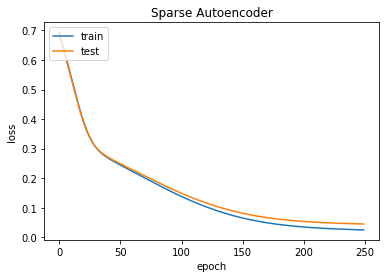

Model Saved!


In [4]:
# Sparse - AE
import matplotlib.pyplot as plt

pretrain_features_size = 10
target_dim_size = 32
autoencoder = Autoencoder()
autoencoder.build_sparse_ae(pretrain_features_size, target_dim_size)

history = autoencoder.train(features, features, features_test, features_test,
                 epochs=250,
                 batch_size=16,
                 shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Sparse Autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

autoencoder.save('model-ae/sparse-ae-decoder.h5', 'model-ae/sparse-ae-encoder.h5')
print ("Model Saved!")

Epoch 1/250
3125/3125 [==============================] - 3s 1ms/step - loss: 0.6540 - val_loss: 0.6451
Epoch 2/250
3125/3125 [==============================] - 3s 1ms/step - loss: 0.6408 - val_loss: 0.6311
Epoch 3/250
3125/3125 [==============================] - 3s 1ms/step - loss: 0.6267 - val_loss: 0.6165
Epoch 4/250
3125/3125 [==============================] - 3s 995us/step - loss: 0.6115 - val_loss: 0.6016
Epoch 5/250
3125/3125 [==============================] - 3s 872us/step - loss: 0.5965 - val_loss: 0.5867
Epoch 6/250
3125/3125 [==============================] - 3s 849us/step - loss: 0.5817 - val_loss: 0.5718
Epoch 7/250
3125/3125 [==============================] - 3s 834us/step - loss: 0.5664 - val_loss: 0.5566
Epoch 8/250
3125/3125 [==============================] - 3s 892us/step - loss: 0.5509 - val_loss: 0.5410
Epoch 9/250
3125/3125 [==============================] - 4s 1ms/step - loss: 0.5351 - val_loss: 0.5253
Epoch 10/250
3125/3125 [==============================] - 3s 1m

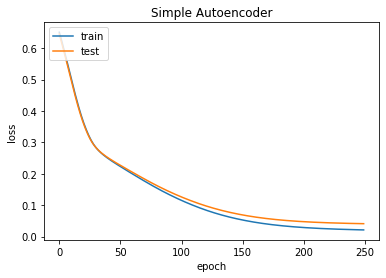

Model Saved!


In [3]:
# Simple - AE
import matplotlib.pyplot as plt

pretrain_features_size = 10
target_dim_size = 32
autoencoder = Autoencoder()
autoencoder.build_simple_ae(pretrain_features_size, target_dim_size)

history = autoencoder.train(features, features, features_test, features_test,
                 epochs=250,
                 batch_size=16,
                 shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Simple Autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

autoencoder.save('model-ae/simple-ae-decoder.h5', 'model-ae/simple-ae-encoder.h5')
print ("Model Saved!")

Epoch 1/100
3125/3125 [==============================] - 5s 2ms/step - loss: 0.2248 - val_loss: 0.0404
Epoch 2/100
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0155 - val_loss: 0.0378
Epoch 3/100
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0151 - val_loss: 0.0368
Epoch 4/100
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0142 - val_loss: 0.0359
Epoch 5/100
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0140 - val_loss: 0.0347
Epoch 6/100
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0136 - val_loss: 0.0338
Epoch 7/100
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0133 - val_loss: 0.0329
Epoch 8/100
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0127 - val_loss: 0.0321
Epoch 9/100
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0126 - val_loss: 0.0313
Epoch 10/100
3125/3125 [==============================] - 7s 2ms/step - l

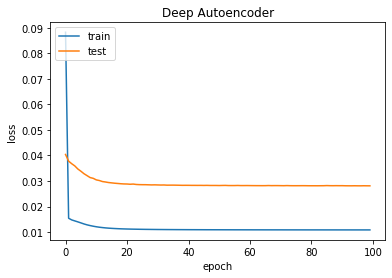

Model Saved!


In [6]:
# Deep - AE
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

pretrain_features_size = 10
target_dim_size = 32
autoencoder = Autoencoder()
opt = optimizers.Adam(lr=0.0001)
autoencoder.build_deep_ae(pretrain_features_size, target_dim_size, opt)

history = autoencoder.train(features, features, features_test, features_test,
                 epochs=100,
                 batch_size=16,
                 shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep Autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

autoencoder.save('model-ae/deep-ae-decoder.h5', 'model-ae/deep-ae-encoder.h5')
print ("Model Saved!")

In [6]:
# Convolutional - AE
import matplotlib.pyplot as plt

pretrain_features_size = 10
target_dim_size = 32
autoencoder = Autoencoder()
autoencoder.build_conv_ae(pretrain_features_size, target_dim_size)

history = autoencoder.train(features, features, features_test, features_test,
                 epochs=100,
                 batch_size=16,
                 shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Convolutional Autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

autoencoder.save('model-ae/conv-ae-decoder.h5', 'model-ae/conv-ae-encoder.h5')
print ("Model Saved!")

ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 10)